<a href="https://colab.research.google.com/github/njamieson2014/statss/blob/main/Copy_of_Final_Project_Notebook_Hahn_Stats_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project Notebook - Spring 2024

In [ ]:
import matplotlib.pyplot as plt
import imageio
import torch
import torchvision
from torchvision import models, transforms
import numpy as np
from torchvision.models import *
from PIL import Image
import requests
from torchvision import models
from torchsummary import summary

In [ ]:
def plot(x):
    fig, ax = plt.subplots()
    im = ax.imshow(x,cmap='gray')
    ax.axis('off')
    fig.set_size_inches(20, 20)
    plt.show() #normal plot function, setting the size to 20x20

In [ ]:
im = imageio.imread('https://raw.githubusercontent.com/imageio/imageio-binaries/master/images/imageio_banner.png') #read images from this url

<ipython-input-40-8ca0bb91738d>:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread('https://raw.githubusercontent.com/imageio/imageio-binaries/master/images/imageio_banner.png') #read images from this url


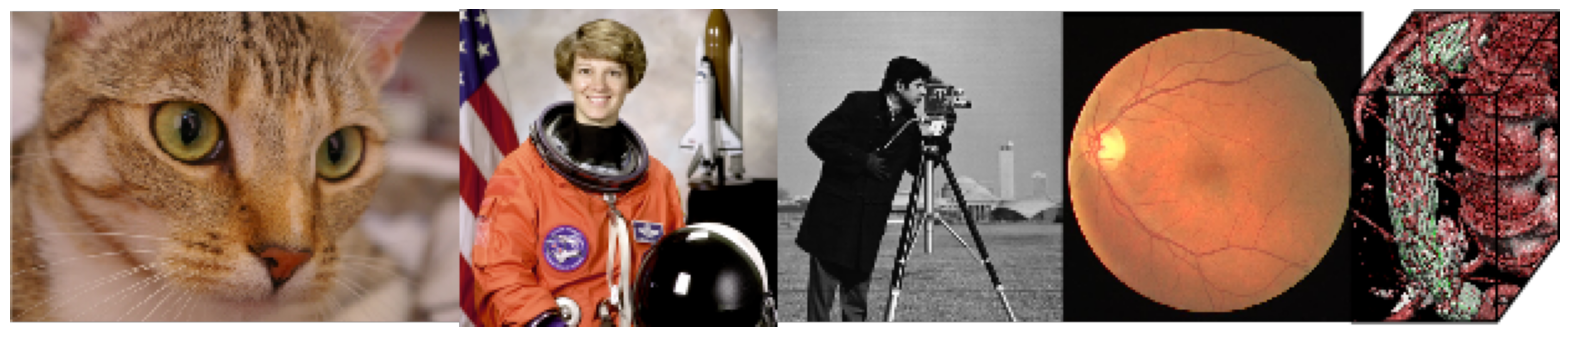

In [ ]:
plot(im) #plot the read images

In [ ]:
net = alexnet(pretrained=True).cuda(0) #loads a pretrained model from alexnet. pretrained=true loads the model weights trained on the imagenet dataset

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx

In [ ]:
normalize = transforms.Normalize(
   mean=[0.485, 0.456, 0.406],
   std=[0.229, 0.224, 0.225]  #normalize the data set of each channel by subtracting the mean and dividing by the standard deviation
)
preprocess = transforms.Compose([
   transforms.Resize(256),
   transforms.CenterCrop(224),
   transforms.ToTensor(),
   normalize #transform the images by resizing, center cropping, and turning them into tensors
])

In [ ]:
im = imageio.imread('https://www.medicalnewstoday.com/content/images/articles/322/322868/golden-retriever-puppy.jpg')

In [ ]:
plot(im)

In [ ]:
image = Image.fromarray(im) #convert to pil

In [ ]:
img_tensor = preprocess(image) #preprocess the image based on the above function

In [ ]:
img_tensor = img_tensor.unsqueeze_(0) #adds a dimension to the front of the tensor

In [ ]:
img_tensor.shape

In [ ]:
img_variable = torch.tensor(img_tensor).cuda(0) #converts the image tensor into a pytorch tensory and moves it to the gpu device

In [ ]:
out = net(img_variable) #runs the image variable into the neural network model "net" and creates a tensory containing the output data

In [ ]:
label_index = out.cpu().data.numpy().argmax() #converts the output into an array, finds the max index, and stores that result

In [ ]:
label_index

In [ ]:
top_list = np.flip(np.argsort(out.cpu().data.numpy())[0][-10:]) #sorts the output tensor into descending order and takes the highest 10 probabilites and stores those into the variable "top_list"

In [ ]:
LABELS_URL = 'https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json'

In [ ]:
labels = {int(key):value for (key, value) in requests.get(LABELS_URL).json().items()} #retrieves class labels from a remote file and converts the keys to integers and stores them in a dictionary named "labels"

In [ ]:
print(labels[label_index]) #prints the label corresponding to the predicted index obtained from the model output

In [ ]:
for i in range(10):
    print(labels[top_list[i]]) #prints the labels generated by the top list function

In [ ]:
net #prints data from the model

In [ ]:
summary(net, (3, 224, 224)) #takes a summary of the data from the model, based on an inputted shape (3x224x224)

In [ ]:
out = net.features[0](img_variable).cpu().detach().numpy() #applies the first convulation layer to the inputted image variable

In [ ]:
plot(out[0,0,:,:]) #plots the first output feature of the first example in the batch

In [ ]:
plt.plot(np.arange(4096),net.classifier[0:6](net.avgpool(net.features[0:13](img_variable)).flatten()).cpu().detach().numpy()) #passes the input image tensor throught the first 13 convultional layers of the model
#selects the first 6 layers of the classifier part of the model, applies an average pooling to the features extracted by the convultional layers, flattens the output into a 1d tensor, plots the flattened output of the classifier against an array of indices from 0-4095, and converts the tensor to a numpy array
fig = plt.gcf() #retrieves the current figure
fig.set_size_inches(10, 10) #set the figure to 10x10 inches

In [ ]:
im = imageio.imread('http://bocasurfcam.com/most_recent_image.php')

In [ ]:
plot(im)

In [ ]:
def load_im(im):
    image = Image.fromarray(im) #convert to pil
    img_tensor = preprocess(image) #preprocess the image for input into the model
    img_tensor = img_tensor.unsqueeze_(0) #adds an extra dimension to the tensor
    img_variable = torch.tensor(img_tensor).cuda(0) #converts the image tensor to a pytorch tensor and moves it to the gpu memory
    return img_variable

In [ ]:
out = net(load_im(im)) #run the image into the model and generate an output tensor

In [ ]:
def inference(im):
    out = net(load_im(im))
    label_index = out.cpu().data.numpy().argmax()
    top_list = np.flip(np.argsort(out.cpu().data.numpy())[0][-10:])
    print(labels[label_index])
    print('____')
    for i in range(10):
         print(labels[top_list[i]]) #perform all of the above operators in one function to input an image into the model and generate a lsit of the 10 best predicitons

In [ ]:
inference(im)

# Restart Notebook (Disconnect and Delete Runtime) Before Running Next Section

# Custom Data Deck

In [ ]:
%%capture
!pip install wandb
!apt-get install poppler-utils
!pip install pdf2image
!pip install flashtorch
import requests
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
import numpy as np
import torch
import requests
from torchvision import *
from torchvision.models import *
from flashtorch.utils import apply_transforms
import wandb as wb


#i do not have a gpu and i keep getting error messages trying to run the code, I will just annotate what is here and do my best to follow along

In [ ]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))  #same gpu functions as before

In [ ]:
def plot(x):
    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(5, 5)
    plt.show() #same plot function as before

In [ ]:
def get_google_slide(url):
    url_head = "https://docs.google.com/presentation/d/"
    url_body = url.split('/')[5]
    page_id = url.split('.')[-1]
    return url_head + url_body + "/export/pdf?id=" + url_body + "&pageid=" + page_id #same google slide import function as before

def get_slides(url):
    url = get_google_slide(url)
    r = requests.get(url, allow_redirects=True)
    open('file.pdf', 'wb').write(r.content)
    images = convert_from_path('file.pdf', 500)
    return images #convert the pdf file to images

def load(image):

    return apply_transforms(image).clone().detach().requires_grad_(True).to(device) #transform the images

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
labels = {int(key):value for (key, value) in requests.get('https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json').json().items()} #obtain the label set from this online hosted set of labels

In [ ]:
model = alexnet(weights='DEFAULT').to(device) #loads an alexnet model using the default weights on the specified device
model.eval();  #sets the model into evaluation mode, different than training mode

In [ ]:
url = "https://docs.google.com/presentation/d/1lyE52a0yLCu9iUiKeFmdKayGJhu2Z6fyToXEMKeigoY/edit#slide=id.p"

In [ ]:
images = [] #same function to grab the images from the google slide and stack them vertically as tensors

for image in get_slides(url):

    plot(image)

    images.append(load(image))

images = torch.vstack(images)

In [ ]:
images.shape

torch.Size([50, 3, 224, 224])

In [ ]:
model(images) #shows the outputted probabilites of the model

tensor([[-4.8363, -1.7062, -6.5514,  ..., -6.4280,  2.2313,  4.6002],
        [-2.4610, -1.9322, -1.9595,  ..., -3.3711,  4.3562,  1.3661],
        [ 0.5000, -2.8847, -4.2440,  ..., -0.8595,  1.1018, -1.5325],
        ...,
        [-4.7940, -0.9639, -3.2165,  ..., -2.8384,  3.9924,  7.5524],
        [ 4.8411,  0.8616, -2.1511,  ..., -2.5370,  2.2719, -0.1802],
        [-2.1405, -2.5763, -4.3909,  ..., -5.1000,  4.1630,  1.6768]],
       grad_fn=<AddmmBackward0>)

In [ ]:
y = model(images)

In [ ]:
y.shape

torch.Size([50, 1000])

In [ ]:
guesses = torch.argmax(y, 1).cpu().numpy() #find the highest value in the guess probability and record its index

In [ ]:
for i in list(guesses):
    print(labels[i]) #print the guesses for each image given by the model

golden retriever
Appenzeller
cocker spaniel, English cocker spaniel, cocker
golden retriever
golden retriever
pug, pug-dog
Samoyed, Samoyede
golden retriever
German shepherd, German shepherd dog, German police dog, alsatian
malinois
Border collie
hare
Sealyham terrier, Sealyham
Staffordshire bullterrier, Staffordshire bull terrier
Border collie
Eskimo dog, husky
Saint Bernard, St Bernard
flat-coated retriever
golden retriever
Labrador retriever
golden retriever
Bernese mountain dog
Pembroke, Pembroke Welsh corgi
English foxhound
Appenzeller
Egyptian cat
Egyptian cat
Egyptian cat
tiger cat
tabby, tabby cat
Siamese cat, Siamese
tabby, tabby cat
tabby, tabby cat
Persian cat
Persian cat
Egyptian cat
Egyptian cat
tabby, tabby cat
Egyptian cat
tabby, tabby cat
Egyptian cat
carton
Madagascar cat, ring-tailed lemur, Lemur catta
grey fox, gray fox, Urocyon cinereoargenteus
Egyptian cat
Siamese cat, Siamese
fox squirrel, eastern fox squirrel, Sciurus niger
tiger cat
Egyptian cat
tabby, tabby cat

In [ ]:
Y = np.zeros(50,)
Y[25:] = 1 #initialize an array of 50 values, 0-24 zero and 25-49, 1

In [ ]:
Y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
X = y.detach().cpu().numpy() #extract the values from the tensor y, move it to the cpu, and convert it to a numpy array

In [ ]:
X.shape

(50, 1000)

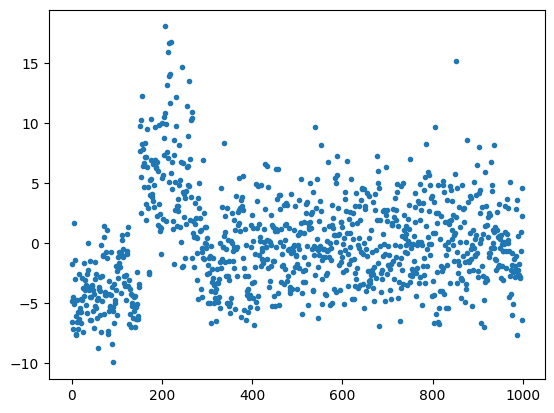

In [ ]:
plt.plot(X[0],'.') #plot the results of the first channel of the outputs (the probabilites) of each guess

In [ ]:
X[0]

array([-4.83631659e+00, -1.70621371e+00, -6.55144262e+00, -7.10621262e+00,
       -4.43974161e+00,  1.66046536e+00, -5.05586100e+00, -2.98898292e+00,
       -1.42402744e+00, -7.62938547e+00, -7.59548426e+00, -6.08855867e+00,
       -6.55105782e+00, -4.74893236e+00, -5.73778534e+00, -7.11399126e+00,
       -2.56937838e+00, -6.34176254e+00, -5.37487221e+00, -5.75060129e+00,
       -6.63853073e+00, -5.72269058e+00, -4.61874151e+00, -4.76840258e+00,
       -2.89162779e+00, -3.71440792e+00, -7.42951441e+00, -1.67930841e+00,
       -4.43125486e+00, -3.93305707e+00, -3.05492449e+00, -3.46275592e+00,
       -3.66005945e+00, -5.18567276e+00, -2.54279351e+00, -5.77438784e+00,
        3.39607894e-02, -2.19271135e+00, -3.86667657e+00, -3.66031313e+00,
       -4.46011972e+00, -6.35586882e+00, -1.51794565e+00, -4.50649405e+00,
       -6.40866041e+00, -3.53920364e+00, -3.50562310e+00, -5.64460945e+00,
       -3.93821096e+00, -7.04629707e+00, -4.18987942e+00, -1.59410882e+00,
       -3.02313447e+00, -

In [ ]:
np.argmax(X[0]) #find the index of the greatest value

207

In [ ]:
labels[948]

'Granny Smith'

In [ ]:
top_ten = np.argsort(X[0])[::-1][0:10] #make a top 10 list of guessses

In [ ]:
for i in top_ten:
    print(labels[i])

golden retriever
Sussex spaniel
Brittany spaniel
Irish setter, red setter
tennis ball
Tibetan mastiff
cocker spaniel, English cocker spaniel, cocker
clumber, clumber spaniel
chow, chow chow
vizsla, Hungarian pointer


In [ ]:
labels #list all of the labels

{0: 'tench, Tinca tinca',
 1: 'goldfish, Carassius auratus',
 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 3: 'tiger shark, Galeocerdo cuvieri',
 4: 'hammerhead, hammerhead shark',
 5: 'electric ray, crampfish, numbfish, torpedo',
 6: 'stingray',
 7: 'cock',
 8: 'hen',
 9: 'ostrich, Struthio camelus',
 10: 'brambling, Fringilla montifringilla',
 11: 'goldfinch, Carduelis carduelis',
 12: 'house finch, linnet, Carpodacus mexicanus',
 13: 'junco, snowbird',
 14: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 15: 'robin, American robin, Turdus migratorius',
 16: 'bulbul',
 17: 'jay',
 18: 'magpie',
 19: 'chickadee',
 20: 'water ouzel, dipper',
 21: 'kite',
 22: 'bald eagle, American eagle, Haliaeetus leucocephalus',
 23: 'vulture',
 24: 'great grey owl, great gray owl, Strix nebulosa',
 25: 'European fire salamander, Salamandra salamandra',
 26: 'common newt, Triturus vulgaris',
 27: 'eft',
 28: 'spotted salamander, Ambystoma 

(array([ 10., 132., 240., 275., 188.,  96.,  30.,  19.,   6.,   4.]),
 array([-9.93096447, -7.1343956 , -4.33782673, -1.54125762,  1.25531137,
         4.05188036,  6.84844923,  9.64501858, 12.44158745, 15.23815632,
        18.03472519]),
 <BarContainer object of 10 artists>)

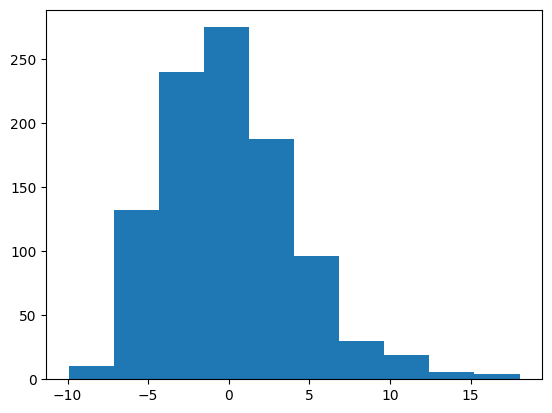

In [ ]:
plt.hist(X[0]) #apply a histogram for the guesses made on the first image, the data resembles a normal distrubiton

In [ ]:
X = GPU_data(X)
Y = GPU_data(Y) #this is where i run into error problems

RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx

In [ ]:
def softmax(x):
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [ ]:
def cross_entropy(outputs, labels):
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]

In [ ]:
def Truncated_Normal(size):

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

In [ ]:
def acc(out,y):
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0] #same functions as before

In [ ]:
X.shape

torch.Size([50, 1000])

In [ ]:
def get_batch(mode):
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b)
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [ ]:
def model(x,w):

    return x@w[0]

In [ ]:
def make_plots():

    acc_train = acc(model(x,w),y)

    wb.log({"acc_train": acc_train}) #same functions as before

In [ ]:
wb.init(project="Linear_Model_Photo_1");
c = wb.config

c.h = 0.001
c.b = 4
c.epochs = 100000

w = [GPU(Truncated_Normal((1000,2)))]

optimizer = torch.optim.Adam(w, lr=c.h)

for i in range(c.epochs):

    x,y = get_batch('train')

    loss = cross_entropy(softmax(model(x,w)),y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    wb.log({"loss": loss})

    make_plots() #optimizer for the model, same one used earlier
